# Linear Regression

It is time for the main event, we are going to build our first predictive model!

The simplest model to build is linear regression. Think back to whenever you have plotted a scatter plot and were asked to draw a line of best fit, this is essentially what linear regression does- it finds the line which best describes the data. We can then use the output to either evaluate the impact a a predictive feature has had on our target, or even predict what a future value may be!

Let's import our college data and start building a model to predict graduation rates.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
college=pd.read_csv('college_data.csv')
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In this lesson we are going to build a model which predicts graduation rates given how much the college is spending per learner. Let's take a look at the data:

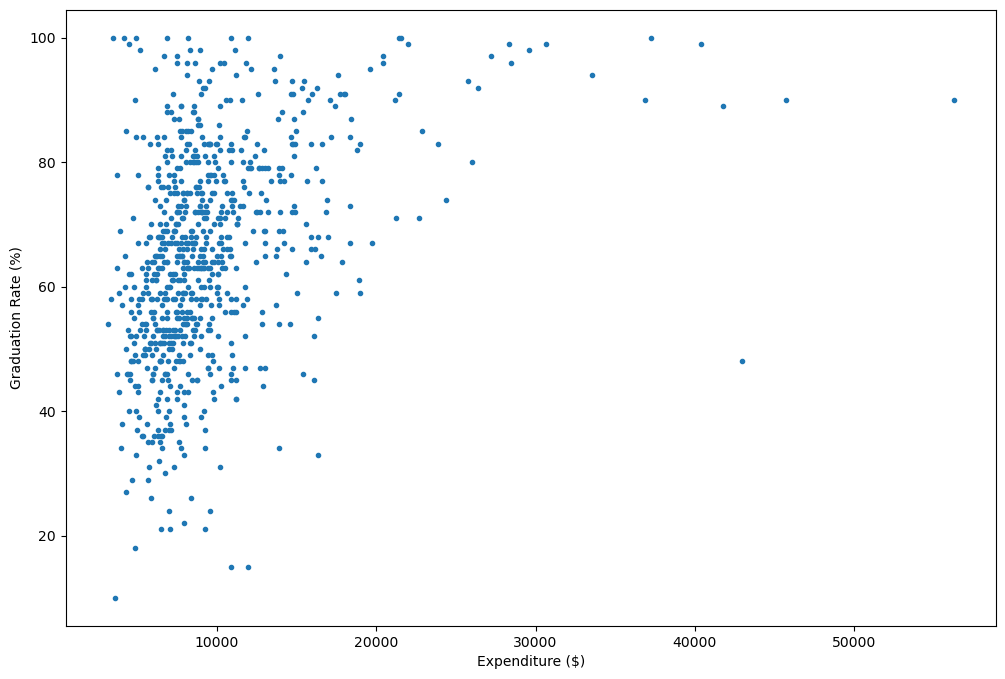

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(college.Expend, college['Grad.Rate'], '.')
ax.set_xlabel('Expenditure ($)')
ax.set_ylabel('Graduation Rate (%)')
plt.plot();

There are several libraries we can use for making models, but the one we will be focussing on is sklearn. An advantage of sklearn is how consistent its syntax is across all possible models in the library, how you code linear regression (the simplest model) is the same how you would code more sophisticated models (although the EDA process will be different).

The first thing we will need to do is extract our target (what we are predicting) as a <b>series</b> and our predictor(s) as a matrix (dataframe).

For now let's build a model with this one predictor.

In [4]:
# target series
y=college['Grad.Rate']

# predictor matrix

X=college[['Expend']]

# Note the usual naming convention - y for target and X for predictors

Now we import the function from the sklearn library:

In [5]:
from sklearn.linear_model import LinearRegression

Next we create the instance for the model:

In [6]:
lr=LinearRegression()

We now have a 'skeleton' of a model. Python knows that we intend to use linear regression, but it doesn't have any data. We need to now fit the data to the model.

In [7]:
lr.fit(X,y)

LinearRegression()

And that's it! We have built our first model!

But how do we use it?

One thing we can do is look at the outputs. The intercept is what value the model will predict when the predictor is equal to 0.

In [8]:
lr.intercept_

52.93845803578205

According to our model, if a college spends $0 per student, the graduation rate will be roughly 53%. 

We can also look at the predictor's coefficient, which we interpret as the effect it has on what we are predicting:

In [9]:
lr.coef_

array([0.0012892])

According to our model, for every $1 a college spends per student the graduation rate goes up by 0.001%.

### Practice

Load in the Ames housing data you explored in the previous section. Build a linear model that predicts sale price given the year the number of full bathrooms it has. Interpret the coefficient and intercept of the model in the context of the data.

In [10]:
house_df=pd.read_csv('house_clean.csv')
house_df.head()

,SalePrice,LotFrontage,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea,Utilities_NoSeWa,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,208500,65.0,8450,2003,2,1,3,2,548,0,...,0,0,0,0,0,0,0,0,0,0
1,181500,80.0,9600,1976,2,0,3,2,460,0,...,0,0,0,0,0,0,0,0,0,1
2,223500,68.0,11250,2001,2,1,3,2,608,0,...,0,0,0,0,0,0,0,0,0,0
3,140000,60.0,9550,1915,1,0,3,3,642,0,...,0,0,0,0,0,0,0,0,0,0
4,250000,84.0,14260,2000,2,1,4,3,836,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
X_h=house_df[['FullBath']]
y_h=house_df.SalePrice

In [12]:
lr_h=LinearRegression()
lr_h.fit(X_h,y_h)

LinearRegression()

In [13]:
print('According to this model a house with no bathrooms would sell for $'+str(lr_h.intercept_))
print('According to this model each bathroom adds $'+str(lr_h.coef_[0])+' to the sale price')

According to this model a house with no bathrooms would sell for $58332.61272499579
According to this model each bathroom adds $77964.1323055253 to the sale price


## Multiple features

In the previous example we only used one predictor, but there is actually no limit to how many we can use. Let's build another model that will predict graduation rate when given a college's expenditure per student and what percentage of students they had that were in the top 10% of their class.

In [39]:
# New predictor matrix (we'll use the same target series as before)
y = college['Grad.Rate']
X2=college[['Top10perc','Expend']]

In [40]:
lr2=LinearRegression()
lr2.fit(X2,y)

LinearRegression()

It is that easy to build a model, you just add as many predictors as you would like to the matrix. Let's see what happens with the outputs this time:

In [41]:
lr2.intercept_

# What do you think this value means?

50.4327718549085

Click to reveal answer

<p style=color:white> If a college spends $0 per student and has no students in the top 10% of their class, the graduation rate (according to the model) will be 50.4%. </p>

In [42]:
lr2.coef_

# What do you think these values mean?

array([4.16152038e-01, 3.60597293e-04])

Click to reveal answer

<p style=color:white>The order of the values printed is the same as the order defined in the predictor matrix. So in this case, for every 1% increase in the precentage of students in the top 10% of their high school class, the graduation rate will increase by 0.4%. For every $1 a college spends on a student, the graduation rate (according to our model) will increase by 0.00036%.</p>

To help interpret coefficients (especially if trying to evaluate which is the most influential) it is an idea to build a dataframe which matches the coefficient to the target and then sort it by effect size. This is particularly useful if you are using a lot of features.

In [43]:
coef_df = pd.DataFrame(
    {'Features': X2.columns, 'Effect Size on Graduation Rate (%)': lr2.coef_}).set_index('Features')
coef_df

,Effect Size on Graduation Rate (%)
Features,
Top10perc,0.416152
Expend,0.000361


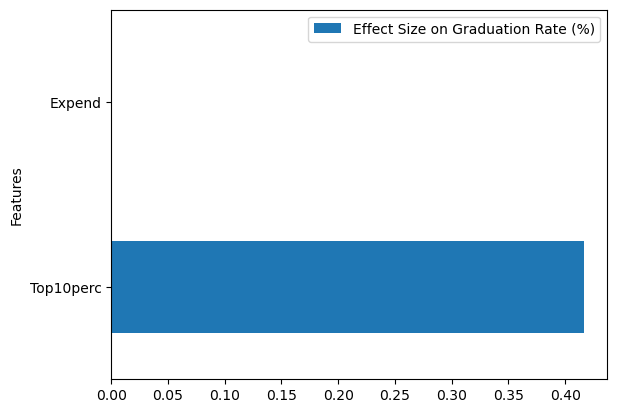

In [44]:
coef_df.plot(kind='barh');

This allows us to clearly see that Top10perc is a much more influential feature than how much a college is spending per student on graduation rates, according to this model. But how reliable is this?

### Practice

Build a second model using the Ames housing dataset that predicts sale price given number of full bathrooms, number of bedrooms and size of the garage. Which feature is the most influential in predicting sale price according to your model?

In [54]:
house_df.columns

Index(['SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'GarageCars', 'GarageArea',
       'Utilities_NoSeWa', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object')

In [55]:
X_h2=house_df[['FullBath','BedroomAbvGr','GarageCars']]

In [56]:
lr_h2=LinearRegression()
lr_h2.fit(X_h2,y_h)

LinearRegression()

In [57]:
coef_df=pd.DataFrame({'Features':X_h2.columns,'Effect Size':lr_h2.coef_}).set_index('Features').sort_values(by='Effect Size',ascending=False)
coef_df

,Effect Size
Features,
GarageCars,51003.382294
FullBath,45475.747710
BedroomAbvGr,182.972284


## Making a prediction

Evaluating the effect a feature has on a prediction is a useful application of a linear model, but what about using it to make a prediction? If we already know the value of the intercept (value target feature takes if all predictors are 0) and the coefficients (effect each predictor has on the target) we can then make predictions.

You may remember from when you were at school that the equation for a straight line is

<p style=font-size:24pt>$y$ = $m$$x$ + $c$</p>

Where m is the gradient and c is the intercept. With linear regression then, c is still the intercept while m is the value of the coefficient. We then write the formula as:

<p style=font-size:24pt>$\hat{y}$ = $\beta$$_0$ + $\beta$$_1$$x$$_1$ </p> 

Where $\beta$$_0$ is the intercept and $\beta$$_1$ is the value of the coefficient for the predictor $x$$_1$. $\hat{a}$ is the prediction.

So in our example if would be:

Predicted graduation rate  = $\beta$$_0$ + $\beta$$_1$ $\times$ Expenditure per student 

For example, a college speds $22239 per student, we can use our model to make the following prediction:

In [49]:
lr.intercept_ + 22239 * lr.coef_[0]

81.6089914547505

What if we also knew that 13% of their learners came from the top 10% of their high school class?

We just expand the formula:

<p style=font-size:24pt>$\hat{y}$ = $\beta$$_0$ + $\beta$$_1$$x$$_1$ + $\beta$$_2$$x$$_2$ + ...</p> 

So our formula would be:

Predicted graduation rate = $\beta$$_0$ + $\beta$$_1$ $\times$ % in top 10% of h.s + $\beta$$_2$ $\times$ expenditure per student


In [50]:
lr2.intercept_ + 13 * lr2.coef_[0] + 22239 * lr2.coef_[1]

63.86207154503296

Notice that the order of coefficients matched the order of the features in the original predictor matrix. This however is a tedious way of performing this prediction, it would be simpler to use the inbuilt `.predict()` function instead.

In [51]:
# model 1

prediction = pd.DataFrame({'Expend' : 22239}, index = [0])

print('Predicted graduation rate: '+str(lr.predict(prediction)[0]))

# model 2

prediction2 = pd.DataFrame({'Top10perc' : 34, 'Expend' : 22239}, index = [0])

print('Predicted graduation rate: '+str(lr2.predict(prediction2)[0]))

Predicted graduation rate: 81.6089914547505
Predicted graduation rate: 72.60126434845745


Notice in both cases that what was passed into the function was a dataframe (like the original predictor matrix) and that the order of features was the same as well. This function works for any number of new data you want to predict, just add it to the matrix!

In [52]:
predictions=pd.DataFrame({'Expend' : [2032, 2434, 9383, 12922]})
lr.predict(predictions)

array([55.55811377, 56.07637244, 65.0350278 , 69.59750893])

### Practice

A house comes to market with 3 full bathrooms, 4 bedrooms and a garage that can fit one car. Using both models predict what the saleprice will be.

In [61]:
X_h2

,FullBath,BedroomAbvGr,GarageCars
0,2,3,2
1,2,3,2
2,2,3,2
3,1,3,3
4,2,4,3
...,...,...,...
1452,2,3,2
1453,2,3,2
1454,2,4,1
1455,1,2,1


In [63]:
first_predict = pd.DataFrame({'FullBath' : 3}, index = [0])

print('Model 1 predicted sale price: $'+str(lr_h.predict(first_predict)[0]))

second_predict = pd.DataFrame({'FullBath' : 3, 'BedroomAbvGr' : 4, 'GarageCars' : 1}, index = [0])
print('Model 2 predicted sale price: $'+str(lr_h2.predict(second_predict)[0]))

Model 1 predicted sale price: $292225.00964157167
Model 2 predicted sale price: $206709.00933788889


## Evaluating a model

A linear regression model works by trying to find a pattern between the predictors and the target feature. However, there is going to be some error, the formula for linear regression is actually:


<p style=font-size:24pt>$\hat{y}$ = $\beta$$_0$ + $\beta$$_1$$x$$_1$ + $\epsilon$ </p> 

Where $\epsilon$ is the error, or residuals. We want our model to minimise this value and to assess this we need some evaluation metrics.


### Compare predictions vs actual values

The simplest method would be to compare what the model predicts vs actual values. We can do this by running our predictor matrix through the model and receiving a set of predictions, we can then compare these to our target series to see how accurate they were:

In [64]:
actuals=college['Grad.Rate'] # this is the same as our target series
preds=lr.predict(X) #predicted values

In [65]:
compare_df = pd.DataFrame({'Predicted Grad Rate': preds,
                          'Actual Grad Rate': actuals}).set_index(college.College)
compare_df

,Predicted Grad Rate,Actual Grad Rate
College,,
Abilene Christian University,62.015720,60
Adelphi University,66.509873,56
Adrian College,64.199626,54
Agnes Scott College,77.453898,59
Alaska Pacific University,67.019108,15
...,...,...
Worcester State College,58.699896,40
Xavier University,64.784923,83
Xavier University of Louisiana,63.668475,49


If the model was truly accurate then you would expect the predicted and actual values to be close. If we then plot these values against each other we should see a diagonal line.

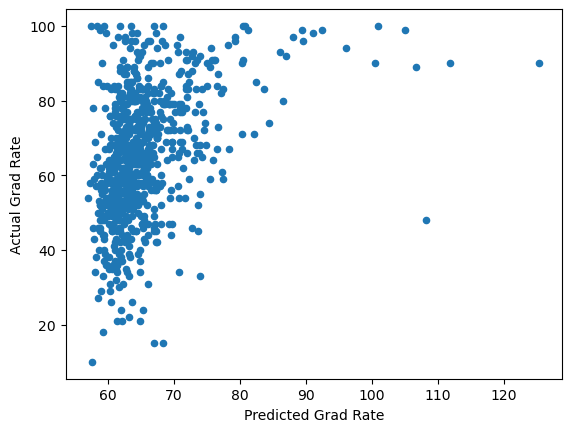

In [66]:
compare_df.plot(x='Predicted Grad Rate',y='Actual Grad Rate',kind='scatter');

This clearly isn't the case, which indicates that our model has made some mistakes- but how bad? This is where we bring in some metrics.

The difference between a predicted value and actual value is called a residual and we want these to be minimised. Model building is an iterative process where we try different combinations of features and see which is best. We therefore need metrics for comparision.

### RMSE

Another method for evaluating our models is to calculate the Root Mean Squared Error (RMSE), a measure of how far away our predictions are from the actual values. 

It is useful for observing how far away each prediction is from the actual value on average. A small RMSE indicates the predictions are close, while a large RMSE indicated the predictions are far off. The value returned is in scale with the data itself, so what counts as "big" depends on the range of the data.

It is calculated by finding the squared difference between each prediction and its actual value, and then finding the square root of the mean of these values.

Fortunately, we don't need to calculate this by hand:

In [68]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(preds,actuals))
print(rmse)

15.690825015099602


This means that our first model was off by an average of 15.7%, which given that the actual values range between 10 and 100 is a significant error. 

In [69]:
# Calculate and interpret the RMSE for model 2

actuals2 = college['Grad.Rate']  # this is the same as our target series
preds2 = lr2.predict(X2)  # predicted values

rmse2 = np.sqrt(mean_squared_error(preds2, actuals2))
print(rmse2)

14.693387539320971


Click to reveal

<p style=color:white> 14.69 -> the average error of predicted graduation rates is 14.7% </p>

### MAE

Similar to the RMSE, is the Mean Absolute Error (MAE). Instead of findng the squared differences between predictions and actual, it finds the absolute difference (i.e. if the difference is negative, make it positive). 

It is useful to calculate both metrics to assess our models.

In [71]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(preds,actuals)
print(mae)

12.386463474868219


This gives a <i>slightly</i> better picture that our model is off on average by 12.4%.

In [72]:
# Calculate and interpret the MAE for model 2

mae2 = mean_absolute_error(preds2, actuals2)
print(mae2)

11.573450351437222


Click to reveal

<p style=color:white> 11.573450351437222-> on average graduation rates have an error of 11.6% </p>

### r-squared

Both MAE and RMSE look at the difference between actual values and predictions, however, there is a different kind of test- r-squared. Essentially, this metric works by comparing your model to just guessing. 

More formally, it is a goodness-of-fit test that looks to explain how much of the variance in what you are predicting comes from your model. Whenever we build a predictive model we expect the target to be somewhat varied (e.g. a set of exam results ranging from 0 to 100) and we want to identify what factors lead to those results. For example, what led student A to get 87% but caused student B to get 34%? 

R-squared then is the metric that shows how much of the target variable's behaviour can be explained by the model that has been built, and it works by comparing your model's predictions to just guessing (i.e. using the mean as a prediction).

The visualisation below shows the spread of our data from earlier with the red line showing the mean as a predictor, and the purple line showing our model as a predictor. Which seems to explain the data better?

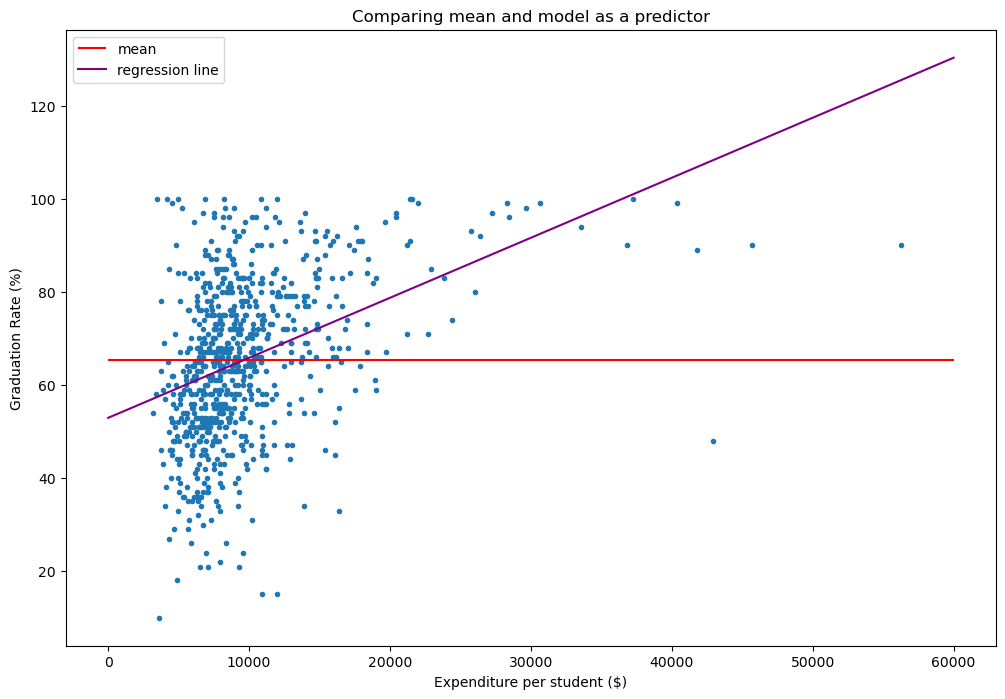

In [73]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(college.Expend, college['Grad.Rate'], '.')
ax.hlines(college['Grad.Rate'].mean(), xmin=0,
          xmax=60000, color='r', label='mean')
X_plot = np.linspace(0, 60000, 200)
ax.plot(X_plot, X_plot*lr.coef_[0]+lr.intercept_,
        color='purple', label='regression line')
ax.legend()
ax.set_title('Comparing mean and model as a predictor')
ax.set_xlabel('Expenditure per student ($)')
ax.set_ylabel('Graduation Rate (%)')
plt.show()

r-squared work using by comparing the total squared error of using your model (<b>RSS</b> - <i>residual sum of squares</i>) against the total squared error of using the mean (<b>TSS</b>- <i>total sum of squares</i>):

<p style=font-size:24pt;text-allign:center>$R^2$= 1 -$\frac{RSS}{TSS}$</p>

In other words, it finds the ratio between the error from using the mean and using your model and subtracts it from 1. If our model is a significantly better estimator than using the mean then the r-squared will be close to 1. On the other hand, if the mean is a significantly better estimator then r-squared will be close to 0 (if not lower).

Thankfully, to save us from having to do this manually sklearn has an inbuilt function that will do this for us called `.score()`. To use this function you need to pass in your predictor matrix and target series:

In [74]:
lr.score(X,y)

0.15543190004469443

But is this score any good?

It depends on the context. In this situation we would read this as: 15.5% of the variance in graduation rates can be explained by using expenditure per student as a predictor. That means 84.5% of the differences between graduation rates are unexplained by this model. 

This means that this model is not particularly good for predicting future graduation rates, but does give us some context our college expenditure- it explains 15.5% of the difference in graduation rates between colleges. 

In real world scenarios there can be hundreds of factors that can explain a result, many of which won't have been captured in the data, so a score of 0.155 may not be that bad. However, if it is a controlled experiment where there is only one or two factors that can explain the result, and you get a score of 0.155 that would be pretty terrible. 

On top of this, you should be skeptical about any model with high r-squared scores. It probably means your model is over-fitting (explaining the data too well) and won't work with new data.

In [75]:
# Calculate and interpret the r-squared for the second model, does it perform better or worse than the first?

# target series
y = college['Grad.Rate']
# predictor matrix
X = college[['Top10perc', 'Expend']]
lr2.score(X, y)

0.25939441631998217

Click to reveal

<p style=color:white> 0.26 -> performs better </p>

### Practice

Calculate RMSE, MAE and r-squared for both models you built for predicting house sale price, which one performs best?

In [77]:
preds_h=lr_h.predict(X_h)
preds_h2=lr_h2.predict(X_h2)

In [78]:
print('Model 1 RMSE: '+str(np.sqrt(mean_squared_error(preds_h,y_h))))
print('Model 2 RMSE: '+str(np.sqrt(mean_squared_error(preds_h2,y_h))))

Model 1 RMSE: 63588.371157466725
Model 2 RMSE: 53952.94236064087


In [79]:
print('Model 1 MAE: '+str(mean_absolute_error(preds_h,y_h)))
print('Model 2 MAE: '+str(mean_absolute_error(preds_h2,y_h)))

Model 1 MAE: 44190.60362311983
Model 2 MAE: 38537.20947205892


In [81]:
print('Model 1 r-squared: '+str(lr_h.score(X_h,y_h)))
print('Model 2 r-squared: '+str(lr_h2.score(X_h2,y_h)))

Model 1 r-squared: 0.31149702558516146
Model 2 r-squared: 0.5043436342342502


## Validating our model

So far we have built our models using all of our available data, but this creates an issue- how do we know if the model will perform just as well on new data?

Not knowing this means we could have an issue with overfitting (where our model fits too well to our data, but not anything new) or underfitting (where our model doesn't fit well at all). 

To know this we need new data to test our model on, but where is it going to come from?

We take it from our data. Before we build our model we remove a testing set (usually 20%) and put it to the side. We then build the model with the remaining 80% (training set) and see how it performs. We then <b>test</b> it with the other 20% and compare the results. As the model has not seen the heldback data we can observe how it reacts to something new, and then compare the results.

If our model performs much worse on the new data we know that it has overfit. If it performs roughly the same then our model is fitting appropriately.

Let's see how we perform this process:

In [82]:
# import train_test_split- a function that will divide up our data

from sklearn.model_selection import train_test_split

`train_test_split` takes two inputs - a predictor matrix and target series. We will also need to define how big the test set should be (usually 20%). The function then has four outputs - a predictor matrix and target series for training, and a predictor matrix and target series for testing.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=100)

You may have noticed the argument `random_state`. This has been included to ensure that the train_test_split picks the same data in each set each time the code is run. You don't always need to do this, but it has been included so everyone using these notebooks get the same output when running the code.

In [85]:
# build model with training data

lr3=LinearRegression()
lr3.fit(X_train,y_train)

LinearRegression()

In [86]:
# Compare r-squared scores

print('Training score: ' + str(lr3.score(X_train,y_train)))
print('Testing score: ' + str(lr3.score(X_test,y_test)))

Training score: 0.2702260283536131
Testing score: 0.19404589966276342


As both scores are similar we can say that our model is neither over or under fitting.

## Practice

Use the train_test_split function to create a training and testing set for your first housing model. Rebuild the model with your training data and test it with the testing data. Does it fit the data well?

In [87]:
X_trainh, X_testh, y_trainh, y_testh = train_test_split(X_h,y_h, train_size=0.8,random_state=888)

In [89]:
lr_h3=LinearRegression()
lr_h3.fit(X_trainh,y_trainh)

LinearRegression()

In [91]:
print('Train score: '+str(lr_h3.score(X_trainh,y_trainh)))
print('Test score: '+str(lr_h3.score(X_testh,y_testh)))

Train score: 0.31546876312171523
Test score: 0.2958986762161341


## Practice

Build a third model that predicts house prices in Ames using any combination of features you would like (hint: check your results from your exploratory data analysis). Use train_test_split to create a training set to build the model and a testing set to evaluate it. Use RMSE, MAE and r-squared to evaluate your model- does it perform better than the other tewo you built?

In [10]:
#A: